# Fashion MNIST 모델

## 데이터 로드
- Fashion MNIST 데이터셋은 케라스에 내장된 데이터셋
- fashion_mnist를 임포트, load_data()를 호출하여 데이터셋을 로드

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

4431872/4422102 [==============================] - 0s 0us/step
전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


**클래스 이름을 변수로 지정**

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [3]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [4]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

- 학습 데이터는 이미지라서 0~255의 값을 가지고 있고, 이를 이미지로 imshow()를 이용해 출력합니다.   
- 값의 범위를 보기 위해 colorbar()를 이용해 출력합니다.

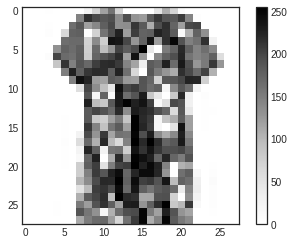

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

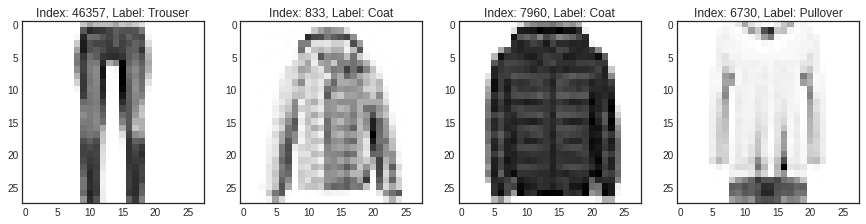

In [6]:
# 랜덤으로 4개를 선택하여 인덱스와 레이블, 그리고 해당 패션 이미지를 출력
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

## 데이터 전처리

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


- 딥러닝 모델에서 Flatten 레이어를 거쳐도 가능하지만, 미리 데이터셋을 reshape()를 통해 28 * 28 크기인 784로 모양을 바꾸어줌
- 28 * 28로만 지정하고 나머지는 -1로 지정하여 자동으로 모양을 맞추도록 함

In [8]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [9]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [10]:
# 범위를 0~1사이로 변환
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [11]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

## 모델 구성

In [12]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일 및 학습

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 2s 7ms/step - loss: 2.1586 - accuracy: 0.3757 - val_loss: 2.0175 - val_accuracy: 0.4486
Epoch 2/60
83/83 [==============================] - 0s 4ms/step - loss: 1.9018 - accuracy: 0.5766 - val_loss: 1.7936 - val_accuracy: 0.5730
Epoch 3/60
83/83 [==============================] - 0s 4ms/step - loss: 1.7049 - accuracy: 0.6270 - val_loss: 1.6212 - val_accuracy: 0.6480
Epoch 4/60
83/83 [==============================] - 0s 4ms/step - loss: 1.5480 - accuracy: 0.6620 - val_loss: 1.4836 - val_accuracy: 0.6333
Epoch 5/60
83/83 [==============================] - 0s 3ms/step - loss: 1.4228 - accuracy: 0.6823 - val_loss: 1.3680 - val_accuracy: 0.6713
Epoch 6/60
83/83 [==============================] - 0s 3ms/step - loss: 1.3215 - accuracy: 0.6968 - val_loss: 1.2809 - val_accuracy: 0.6856
Epoch 7/60
83/83 [==============================] - 0s 4ms/step - loss: 1.2399 - accuracy: 0.7039 - val_loss: 1.2072 - val_accuracy: 0.6908
Epoch 8/60
83/83 [==

In [15]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

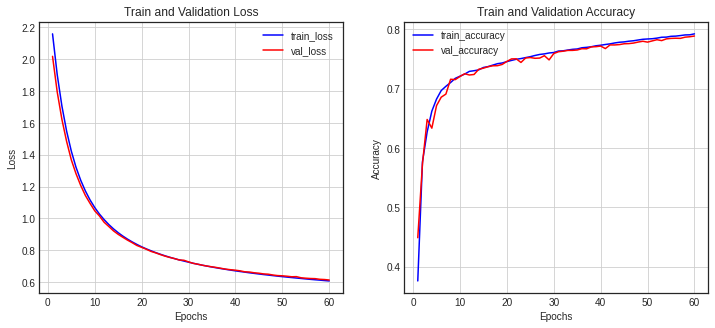

In [16]:
show_history(history)

## 모델 평가 및 예측

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6273 - accuracy: 0.7807


[0.6273345351219177, 0.7807000279426575]

In [18]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

[1.9991668e-02 9.3293065e-01 3.4373202e-03 1.4073116e-02 2.2933709e-02
 8.0236794e-05 6.4132861e-03 3.7714617e-05 8.3181287e-05 1.9182247e-05]
1
Trouser


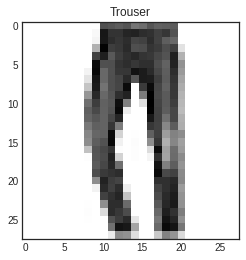

In [19]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [20]:
# 이미지와 레이블을 함께 출력
# 예측한 결과 레이블인 predicted_label과 정답 레이블인 y_test가 동일하면 색으로 blue를 사용하고, 다르면 red 색을 사용
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [21]:
# 전체 10개 분류 중에서 어떤 클래스에 얼만큼의 확률로 예측을 했는지 출력
# 예측한 레이블은 red 색상으로 표시하고, 정답 레이블은 blue 색상으로 표시
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

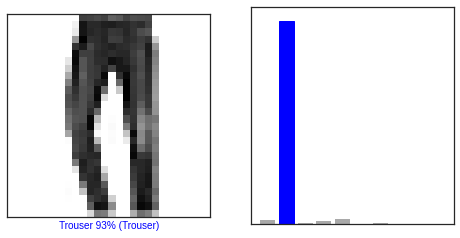

In [22]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

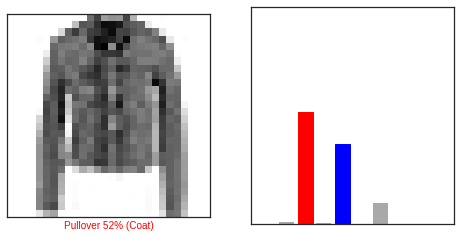

In [23]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

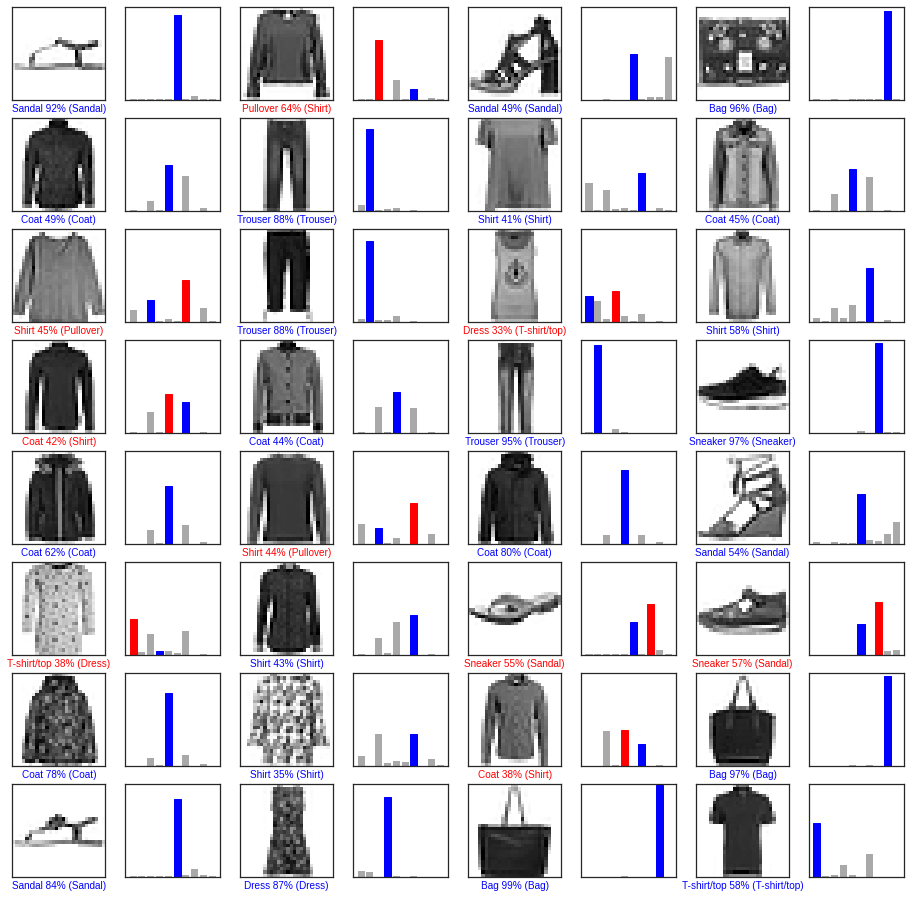

In [24]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [25]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.78      0.76      1000
     Trouser       0.97      0.92      0.95      1000
    Pullover       0.71      0.61      0.65      1000
       Dress       0.77      0.82      0.79      1000
        Coat       0.62      0.75      0.68      1000
      Sandal       0.82      0.87      0.85      1000
       Shirt       0.49      0.40      0.44      1000
     Sneaker       0.86      0.83      0.85      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.91      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



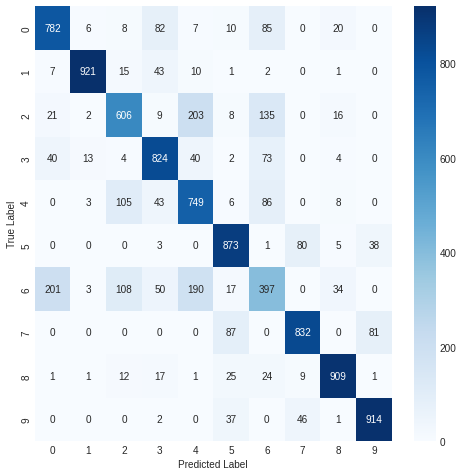

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 모델 최적화

## Early Stopping
- 딥러닝 모델이 학습을 진행하면서 가장 좋은 모델이 fashion_mnist_model.h5 파일로 저장되도록 콜백 함수로 ModelCheckpoint를 사용
- val_loss 값을 10개씩 연속으로 모니터링하며 성능 변화가 없으면 조기 종료되도록 EarlyStopping을 사용\

In [27]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5939 - accuracy: 0.7949 - val_loss: 0.5838 - val_accuracy: 0.7963
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5662 - accuracy: 0.8045 - val_loss: 0.5623 - val_accuracy: 0.8060
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5454 - accuracy: 0.8101 - val_loss: 0.5502 - val_accuracy: 0.8076
Epoch 4/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5289 - accuracy: 0.8161 - val_loss: 0.5395 - val_accuracy: 0.8102
Epoch 5/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5163 - accuracy: 0.8206 - val_loss: 0.5203 - val_accuracy: 0.8185
Epoch 6/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5053 - accuracy: 0.8239 - val_loss: 0.5154 - val_accuracy: 0.8172
Epoch 7/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4961 - accuracy: 0.8266 - val_loss: 0.5087 - val_accuracy:

In [ ]:
show_history(history)

In [ ]:
model.evaluate(x_test, y_test)

## 활성화 함수

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [ ]:
diff_history(history, history2)

In [ ]:
model.evaluate(x_test, y_test)

## 옵티마이저

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
diff_history(history, history3)

In [ ]:
model.evaluate(x_test, y_test)

## 규제

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer='l2', activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [ ]:
history4 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
diff_history(history, history4)

In [ ]:
model.evaluate(x_test, y_test)

## 드롭아웃

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [ ]:
history5 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
diff_history(history, history5)

In [ ]:
diff_history(history4, history5)

In [ ]:
model.evaluate(x_test, y_test)

## 배치 정규화

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid')) 
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [ ]:
history6 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
diff_history(history, history6)

In [ ]:
model.evaluate(x_test, y_test)

## 배치 정규화 + 드롭아웃

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [ ]:
history7 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
diff_history(history, history7)

In [ ]:
model.evaluate(x_test, y_test)

# 모델 결과 분석

In [ ]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

In [ ]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)
plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()